# ML for Music Analysis

In [50]:
import librosa
import matplotlib.pyplot as plt
import librosa.display
import os
import pickle

def get_mfcc(file_path):
    """
    Given the path to the audio file return the MFCC of the audio
    :param file_path: string path
    :return: a list of lists containing the MFCC data
    """
    y, sr = librosa.load(file_path, sr=None)
    return librosa.feature.mfcc(y=y, sr=sr, ), sr

In [47]:
def display_mfcc_coefs(coefs, sr):
    plt.figure(figsize=(15, 10))
    librosa.display.specshow(coefs, sr=sr)
    plt.xlabel("Time")
    plt.ylabel("MFCC coefficients")
    plt.colorbar()
    plt.title("MFCCs")
    plt.show()

### Testing the function with a music

In [44]:
test_mfcc, sr = get_mfcc("ImperialMarch60.wav")

In [45]:
test_mfcc

array([[-5.8397711e+02, -5.8182330e+02, -5.8194391e+02, ...,
        -3.8027869e+02, -3.8912073e+02, -3.9562219e+02],
       [ 5.2084279e+00,  8.1875582e+00,  8.0080500e+00, ...,
         1.3641995e+02,  1.3420198e+02,  1.2909521e+02],
       [ 5.1931534e+00,  8.0845499e+00,  7.9450846e+00, ...,
        -1.5321053e+01, -1.4700988e+01, -1.7241497e+01],
       ...,
       [ 3.9588578e+00,  5.2760687e+00,  4.9172173e+00, ...,
        -7.9437132e+00, -5.5036983e+00,  1.5631807e-01],
       [ 3.8337159e+00,  5.0671401e+00,  4.5343189e+00, ...,
        -4.4089856e+00, -2.6234231e+00,  2.2902029e+00],
       [ 3.7069526e+00,  4.9134979e+00,  4.2791052e+00, ...,
         1.8409295e+00,  5.5532107e+00,  5.0142932e+00]], dtype=float32)

In [13]:
test_mfcc.shape

(20, 2584)

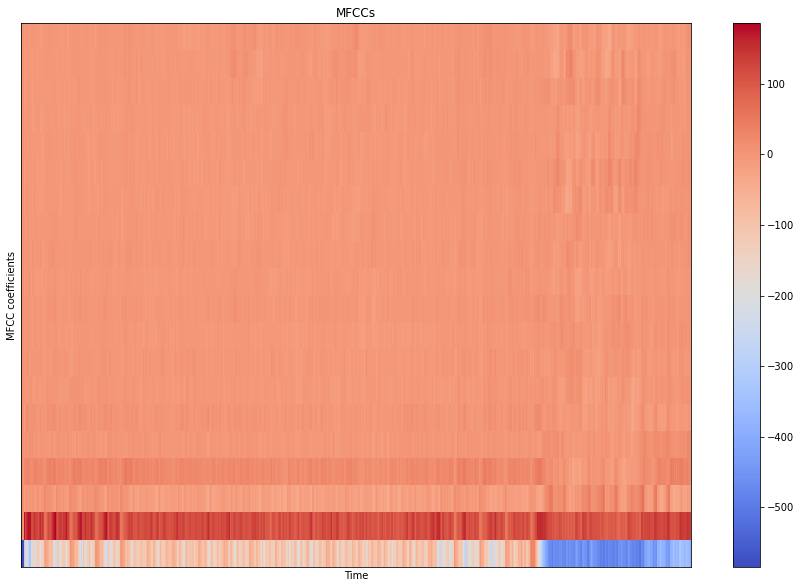

In [48]:
display_mfcc_coefs(test_mfcc, sr=sr)

## MFCC for the sample training data

In [16]:
os.listdir("./sample_train_music")

['06 Nights Like This (feat. Ty Dolla $ign).m4a',
 '.DS_Store',
 '03 How Do I Make You Love Me_.m4a',
 '18 Lights.m4a',
 'We On _CJ x Iamsu (prod L1V3Pr0deuce x IAMSU) ruff 1_01.mp3',
 '08 Ring (feat. Kehlani).m4a',
 '04 CHILL FOO.m4a',
 '05 Good as Hell.m4a',
 '19 Burn.m4a',
 '01 Follow.m4a',
 '01 One Right Now.m4a']

In [35]:
path = "./sample_train_music"
mfccs = {}
for file_name in os.listdir(path):
    if file_name.startswith("."):
        continue
    mfccs[file_name] = get_mfcc(path + "/" + file_name)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/

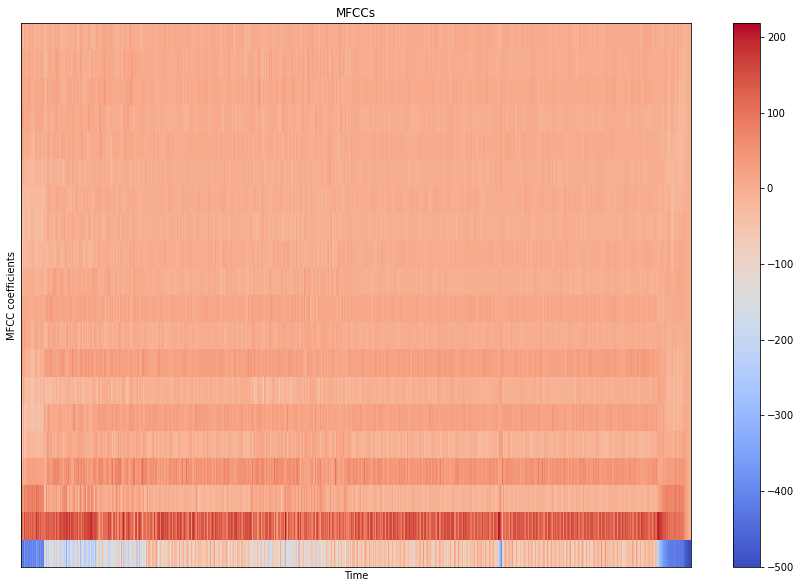

In [49]:
song = mfccs['18 Lights.m4a']
display_mfcc_coefs(song[0], sr=song[1])

In [54]:
# saving the features as a pickle file
with open("./train_mfccs.pkl", "wb") as f:
    pickle.dump(mfccs, f)

In [ ]:
# to load the file run:
# with open("./train_mfccs.pkl", "rb") as f:
#     mfccs = pickle.load(f)